In [1]:
import pickle
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings

warnings.filterwarnings("ignore")

In [2]:
domains = ['brand', 'good', 'trait', 'food', 'occupation', 'risk', 'people']
dims = [('sincere','exciting'),
        ('hedonic','utilitarian'),
        ('masculine','feminine'),
        ('tasty','nutritious'),
        ('significance','autonomy'),
        ('dread-inducing','unknowable'),
        ('warm', 'competent')]

dim_names_flattened = [x for dim_pair in dims for x in dim_pair]

In [3]:
wv_from_bin = KeyedVectors.load_word2vec_format(fname="GoogleNews-vectors-negative300.bin", binary=True)  # C binary format

In [4]:
# high_words = pd.read_excel('data/judgment_lexicons.xlsx', sheet_name='high')
high_words = pd.read_excel('data/judgment_lexicons_alt_gender.xlsx', sheet_name='high')
high_words.head(7)

,sincere,exciting,hedonic,utilitarian,masculine,feminine,tasty,nutritious,autonomy,significance,dread-inducing,unknowable,warm,competent
0,sincere,exciting,hedonistic,utilitarian,masculine,feminine,tasty,nutritious,autonomy,significant,dread,unknowable,warm,efficient
1,honest,daring,fun,effective,male,female,yummy,healthy,freedom,meaningful,uncontrollable,unobservable,generous,foresighted
2,wholesome,spirited,exciting,helpful,man,woman,delicious,nourishing,independence,important,catastrophic,unknown,helpful,creative
3,cheerful,imaginative,delightful,functional,NaN,NaN,appetizing,wholesome,discretion,NaN,fatal,delayed,sincere,competent
4,NaN,NaN,thrilling,necessary,NaN,NaN,scrumptious,NaN,NaN,NaN,NaN,new,tolerant,intelligent
5,NaN,NaN,enjoyable,practical,NaN,NaN,delectable,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def get_vec(word):
    try:
        return wv_from_bin[word]
    except:
        if type(word) == str:
            print(word)
        return np.nan

In [6]:
high_word_vecs = high_words.applymap(get_vec)
high_word_vecs

,sincere,exciting,hedonic,utilitarian,masculine,feminine,tasty,nutritious,autonomy,significance,dread-inducing,unknowable,warm,competent
0,"[0.006591797, 0.14746094, 0.21679688, 0.214843...","[-0.24609375, -0.171875, 0.06689453, -0.024291...","[-0.03515625, -0.041503906, -0.004852295, 0.34...","[0.20214844, -0.037841797, -0.18066406, 0.3652...","[0.08935547, 0.024902344, -0.033935547, 0.0708...","[0.05126953, -0.068359375, -0.041503906, 0.015...","[-0.17382812, 0.024047852, -0.030151367, 0.277...","[-0.3125, -0.0058898926, -0.008666992, 0.36523...","[-0.12109375, -0.3671875, -0.032226562, 0.5039...","[-0.033203125, -0.03881836, -0.14941406, 0.109...","[0.30664062, -0.123535156, 0.31835938, 0.08886...","[0.43359375, -0.076660156, 0.25585938, 0.32226...","[0.040527344, 0.19921875, -0.033203125, 0.0197...","[-0.029785156, 0.071777344, -0.021240234, 0.08..."
1,"[0.26367188, 0.0066833496, 0.014709473, 0.2578...","[0.08642578, 0.060302734, 0.02722168, 0.022338...","[0.07910156, -0.12011719, -0.09423828, 0.26953...","[-0.028930664, -0.03491211, -0.12597656, 0.078...","[-0.067871094, 0.092285156, -0.022094727, -0.1...","[-0.11669922, 0.052246094, 0.021972656, -0.156...","[-0.18945312, -0.06591797, -0.041748047, 0.433...","[-0.14550781, 0.24804688, -0.15136719, 0.24609...","[0.26757812, -0.078125, 0.09326172, 0.38671875...","[-0.12792969, -0.03540039, -0.080078125, 0.011...","[0.19921875, -0.0099487305, -0.10839844, 0.130...","[0.23535156, -0.265625, 0.08544922, 0.15917969...","[0.06591797, 0.03491211, -0.115234375, 0.45507...","[0.08544922, 0.20703125, -0.01965332, 0.122558..."
2,"[-0.140625, 0.13085938, 0.052490234, 0.1474609...","[0.18847656, 0.3359375, -0.042236328, 0.020751...","[-0.24609375, -0.171875, 0.06689453, -0.024291...","[-0.0061950684, -0.024291992, 0.015563965, 0.0...","[0.32617188, 0.13085938, 0.03466797, -0.083007...","[0.24316406, -0.07714844, -0.103027344, -0.107...","[-0.18164062, -0.1328125, 0.0390625, 0.3144531...","[-0.17773438, 0.19726562, 0.03515625, 0.223632...","[-0.32617188, -0.30859375, -0.24902344, 0.1914...","[0.08203125, -0.07910156, 0.05053711, -0.02392...","[-0.15722656, -0.007659912, 0.015319824, 0.308...","[0.28125, 0.005554199, 0.018188477, -0.1904296...","[-0.0061950684, -0.024291992, 0.015563965, 0.0...","[0.06591797, -0.140625, -0.14257812, 0.2314453..."
3,"[0.10986328, 0.23925781, -0.03540039, 0.096191...","[0.010864258, -0.099121094, 0.016723633, 0.231...","[0.12792969, -0.13183594, -0.09765625, 0.13671...","[-0.14746094, -0.18554688, -0.14941406, -0.007...",NaN,NaN,"[-0.359375, 0.20703125, 0.107421875, 0.265625,...","[-0.140625, 0.13085938, 0.052490234, 0.1474609...","[-0.061523438, 0.26757812, 0.23535156, 0.32617...",NaN,"[0.0073242188, -0.052246094, 0.23535156, 0.107...","[-0.07910156, 0.25976562, 0.18652344, -0.02551...","[0.006591797, 0.14746094, 0.21679688, 0.214843...","[-0.17871094, -0.015197754, 0.004852295, 0.077..."
4,NaN,NaN,"[0.057861328, 0.059326172, 0.19140625, -0.1914...","[-0.15332031, 0.0070495605, 0.01965332, -0.217...",NaN,NaN,"[-0.34960938, -0.21484375, -0.091796875, 0.316...",NaN,NaN,NaN,NaN,"[0.011291504, 0.028930664, 0.083496094, -0.049...","[-0.05859375, 0.21386719, 0.072753906, 0.39453...","[0.15136719, -0.038330078, -0.12890625, 0.2148..."
5,NaN,NaN,"[-0.111816406, -0.18652344, -0.25, 0.083496094...","[-0.03125, -0.19921875, -0.067871094, 0.040283...",NaN,NaN,"[-0.21484375, -0.13378906, -0.038330078, 0.384...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# low_words = pd.read_excel('data/judgment_lexicons.xlsx', sheet_name='low')
low_words = pd.read_excel('data/judgment_lexicons_alt_gender.xlsx', sheet_name='low')
low_word_vecs = low_words.applymap(get_vec)

In [8]:
dim_vecs = []
for dim in high_word_vecs.columns:
    curr_high = high_word_vecs[dim].dropna()
    curr_low  = low_word_vecs[dim].dropna()
    avg_diff = np.array([(x-y) for x, y, in product(curr_high, curr_low)]).mean(axis=0)
    dim_vecs.append(avg_diff)
dim_vecs_df = pd.DataFrame(dim_vecs, index=high_word_vecs.columns)
dim_vecs_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
sincere,-0.090576,0.056602,-0.059738,0.230011,0.081116,0.090279,0.228943,-0.005371,-0.083893,-0.082916,...,-0.096397,-0.038284,0.026642,-0.122517,-0.019836,0.098328,0.054337,-0.051895,0.130005,-0.097415
exciting,-0.134979,-0.131195,-0.031158,-0.109253,0.154205,-0.242981,-0.252869,0.102875,-0.137268,-0.061630,...,0.025345,-0.081116,-0.119629,-0.248619,0.087677,-0.021038,-0.006592,-0.044891,0.047729,-0.097046
hedonic,-0.094686,-0.138184,-0.052444,-0.001607,0.130692,-0.265666,-0.163249,0.034688,-0.263947,0.026693,...,0.022400,-0.000488,-0.030711,-0.190470,0.060465,-0.013041,0.049377,-0.024394,0.098256,-0.171712
utilitarian,-0.153661,-0.243525,-0.179016,-0.005483,0.156576,-0.251504,-0.033610,0.030248,-0.071508,-0.213359,...,-0.204427,-0.147685,0.080009,-0.008789,0.112905,0.175964,0.139882,-0.102478,0.159098,-0.065104
masculine,-0.103109,0.088967,0.124990,-0.216858,0.165080,-0.187937,-0.153849,0.115448,-0.010559,-0.054955,...,0.028158,-0.133870,0.070394,-0.058451,0.039907,0.012098,-0.149007,-0.273158,0.033691,0.016154
feminine,-0.159749,-0.024803,0.091258,-0.237488,0.211466,-0.284047,-0.152629,0.049835,-0.058899,-0.044373,...,0.052389,-0.192139,0.013265,-0.243673,-0.009735,0.059909,0.040365,-0.159958,0.177330,-0.013672
tasty,-0.228027,-0.092626,-0.177226,0.188965,0.294027,-0.072337,-0.030029,0.020223,-0.478597,0.108765,...,0.129476,-0.171794,0.056193,-0.033773,0.270060,-0.050537,-0.176687,-0.010824,0.098511,-0.040283
nutritious,-0.196106,0.092949,-0.092272,0.205241,0.087682,-0.059021,0.003011,-0.209763,-0.278361,-0.350393,...,-0.222056,-0.299032,-0.101443,0.058014,0.167969,0.103984,0.146484,0.053841,0.139730,-0.104289
autonomy,-0.143229,-0.055664,0.046183,0.322428,0.365763,-0.201253,0.084676,0.005452,-0.036112,-0.018026,...,0.023519,-0.457011,0.086134,-0.214447,0.000422,-0.024597,0.217000,0.142985,0.002574,-0.036950
significance,-0.273682,-0.140203,-0.155996,0.005264,0.124837,-0.345174,-0.306763,-0.035533,-0.010173,-0.259603,...,-0.103088,-0.083974,0.160618,0.009748,0.031189,0.181539,-0.128485,-0.017354,0.120626,-0.140096


In [9]:
with open("data/dict_of_Xs.pickle", "rb") as handle:
    dict_of_Xs = pickle.load(handle)
    
with open("data/dict_of_ys.pickle", "rb") as handle:
    dict_of_ys = pickle.load(handle)

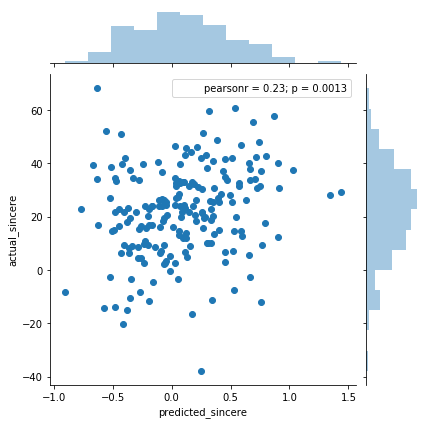

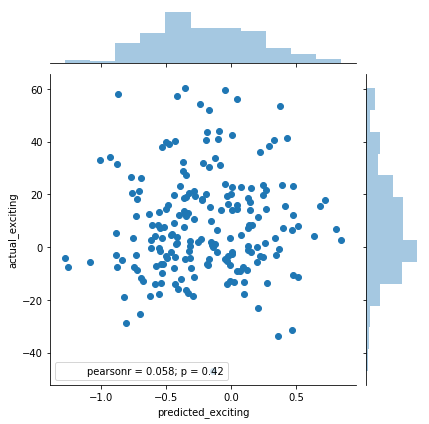

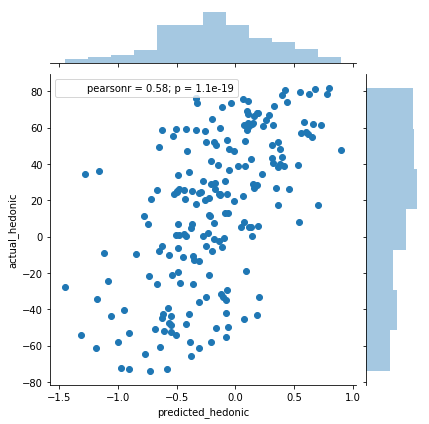

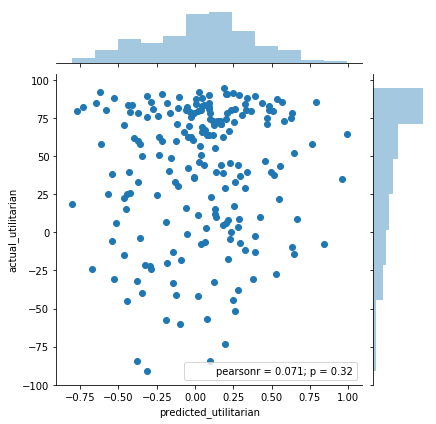

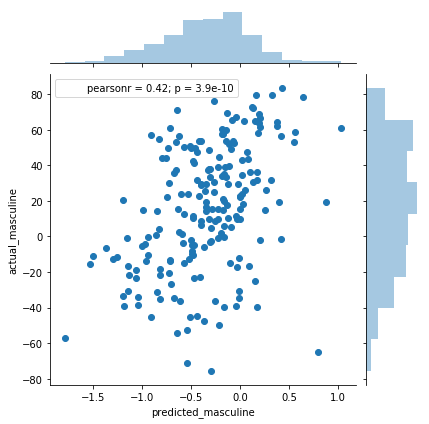

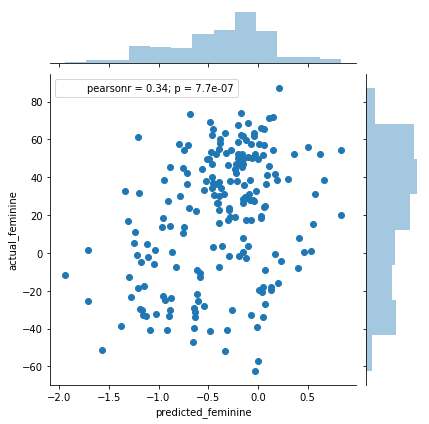

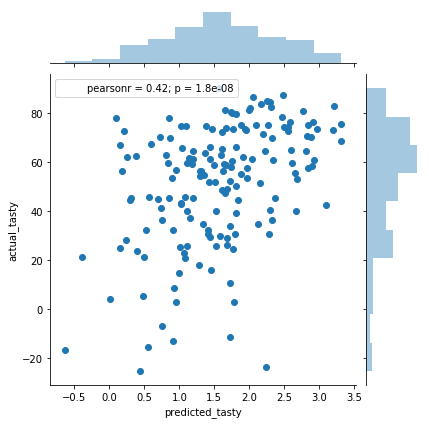

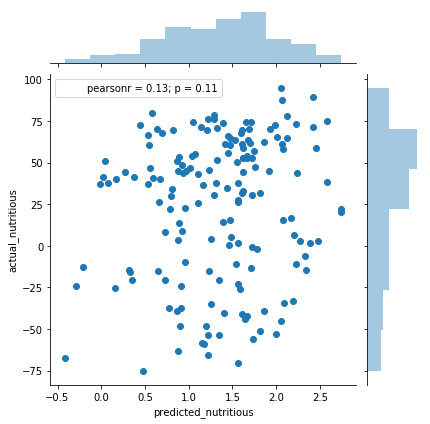

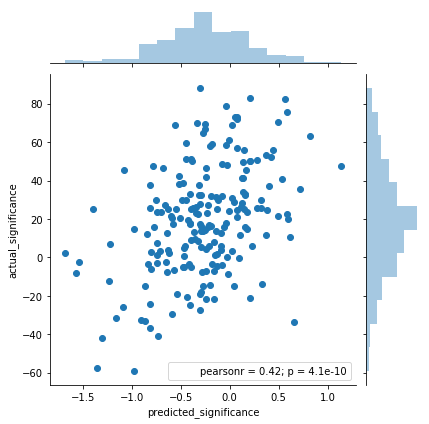

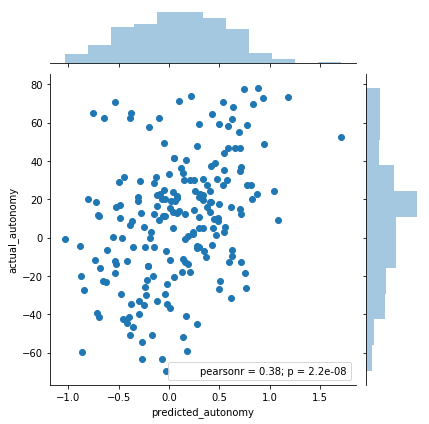

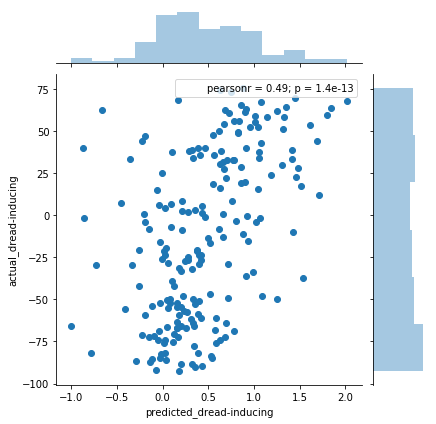

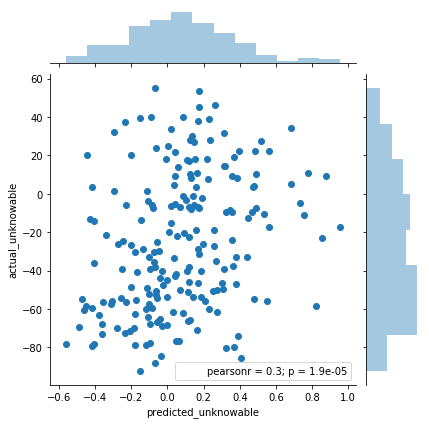

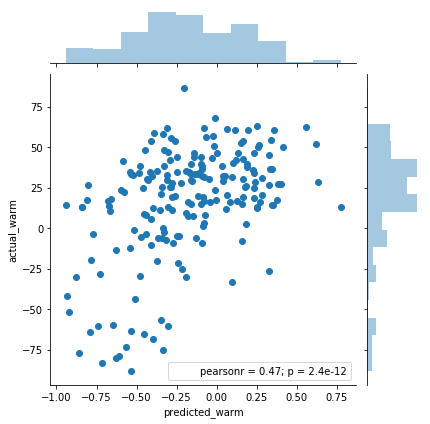

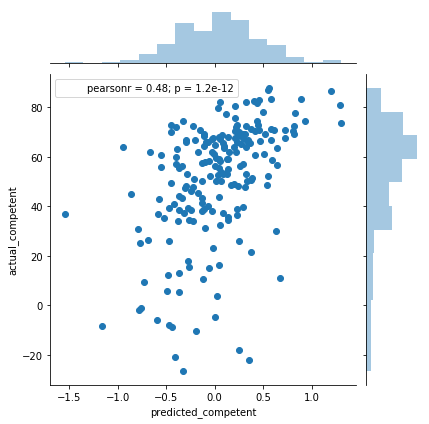

In [12]:
correlation_results = []

for domain, dim_pair in zip(domains, dims):
    X = dict_of_Xs[domain]
    for dim in dim_pair:
        dim_vec = dim_vecs_df.loc[dim].values
        dot_products = X.dot(dim_vec)
        y = dict_of_ys[dim]
        y.name = f'actual_{dim}'
        dot_products = pd.Series(dot_products, name=f'predicted_{dim}')

        sns.jointplot(x=dot_products, y=y)
        plt.savefig(f'figures/pred_v_actual_scatterplots_grand_et_al/{dim}.png')
        plt.show()
        
        r, p = pearsonr(dot_products, y)
        correlation_results.append((r,p, r**2))
        
correlation_results = pd.DataFrame(correlation_results, index=dim_names_flattened, columns=['r','p','rsquared'])
correlation_results.to_csv('results/grand_et_al_method.csv', float_format='%.4f')